<a href="https://colab.research.google.com/github/jkeza1/Group7_water-quality-model/blob/main/excel_asaph_copy_of_formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excel Asaph - Water Quality Model

A notebook demonstrating a water quality classification model using TensorFlow and Keras.

## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [20]:
# Imports necessary libraries for the notebook, including pandas, matplotlib, tensorflow, and modules from sklearn for data processing and model evaluation.

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [21]:
# Loads the water quality dataset from a CSV file named water_potability.csv into a pandas DataFrame.
# Displays the first few rows of the DataFrame to preview the data.

data = pd.read_csv('/content/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [22]:
# --- Data Preprocessing ---
# Handles missing data by interpolating values, then using forward and backward fill to ensure no missing values remain.
# Separates the features (X) from the target variable (y).

data = data.interpolate(inplace=False).bfill().ffill()

X = data.drop('Potability', axis=1)
y = data['Potability']

In [23]:
# Calculates and prints the distribution of the target classes ('Potability') to understand class balance in the dataset.

class_counts = data['Potability'].value_counts()

print("Class distribution:")
print(class_counts)

Class distribution:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [24]:
# Splits the data into training, validation, and testing sets using train_test_split.

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [25]:
# Initializes and applies StandardScaler to scale the features in the training, validation, and testing sets.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Each Memeber Defines their model Here

In [26]:
# Model Definition
# The model consists of Dense layers with ReLU activation, a Dropout layer for regularization, and a final Dense layer with sigmoid activation for binary classification.

def excel_water_quality_model():
  model = Sequential([
      Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), input_shape=(X_train.shape[1],)),
      Dense(64, activation='relu'),
      Dense(128, activation='relu'),
      Dropout(0.25),
      Dense(1, activation='sigmoid'),
  ])
  return model

# Start the training Process

In [27]:
model = excel_water_quality_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
optimizer = Adam(learning_rate=0.001)

In [29]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
history = model.fit(X_train, y_train, epochs=1000, batch_size= 128, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5842 - loss: 1.1922 - val_accuracy: 0.6314 - val_loss: 1.1391
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6044 - loss: 1.1344 - val_accuracy: 0.6354 - val_loss: 1.0861
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6084 - loss: 1.0790 - val_accuracy: 0.6395 - val_loss: 1.0351
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6220 - loss: 1.0268 - val_accuracy: 0.6354 - val_loss: 0.9884
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6225 - loss: 0.9845 - val_accuracy: 0.6395 - val_loss: 0.9428
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6457 - loss: 0.9284 - val_accuracy: 0.6477 - val_loss: 0.9061
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6682 - loss: 0.8978 - val_accuracy: 0.6660 - val_loss: 0.8643
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6532 - loss: 0.8654 - val_accuracy:

In [32]:
# Evaluates the trained model on the test set to determine its performance (loss and accuracy) on unseen data.

loss, accuracy = model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7060 - loss: 0.6113 


In [33]:
# Makes predictions on the test set using the trained model.
# Converts the predicted probabilities into binary predictions based on a threshold of 0.5.
# Computes and prints a classification report, which includes precision, recall, F1-score, and support for each class.
# Computes a confusion matrix to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.

y_pred = model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
print(report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       307
           1       0.66      0.40      0.50       185

    accuracy                           0.70       492
   macro avg       0.68      0.64      0.64       492
weighted avg       0.69      0.70      0.68       492



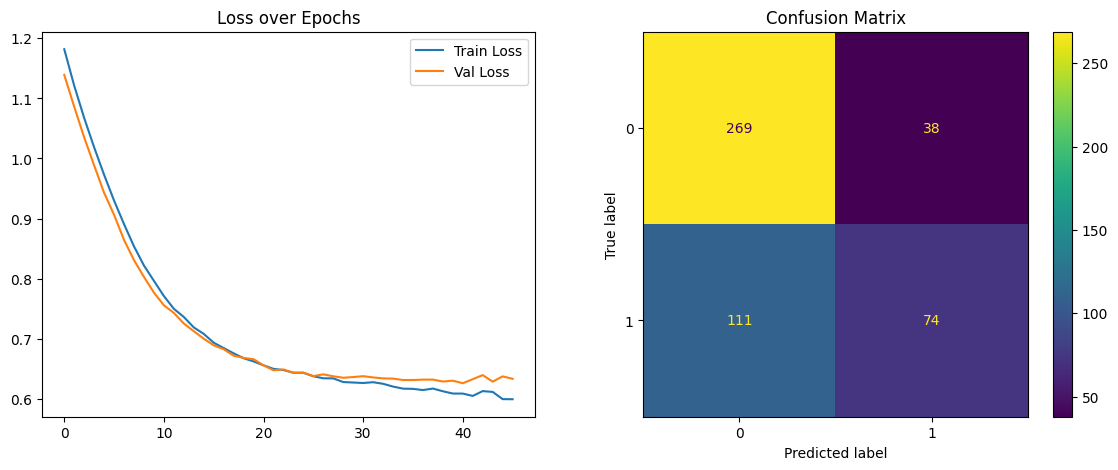

In [34]:
# A plot showing the training and validation loss over epochs.
# A visualization of the confusion matrix.

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Val Loss')
axs[0].set_title('Loss over Epochs')
axs[0].legend()

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix')

plt.show()

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,645 (127.52 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,764 (85.02 KB)